In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import plotly.graph_objs as go
import plotly.express as px
from sklearn.model_selection import cross_val_score



In [2]:
df=pd.read_csv('dataframe_final.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location
0,2014-10-13,221900,3,1,1180,5650,1,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Bryn Mawr-Skyway
1,2014-12-09,538000,3,2,2570,7242,2,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Shoreline
2,2015-02-25,180000,2,1,770,10000,1,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Inglewood-Finn Hill
3,2014-12-09,604000,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,White Center
4,2015-02-18,510000,3,2,1680,8080,1,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,City of Sammamish


In [4]:
columnsDrop = ['date', 'yr_renovated','location'] 
df = df.drop(columns=columnsDrop)

In [5]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503


### Handling Outliers

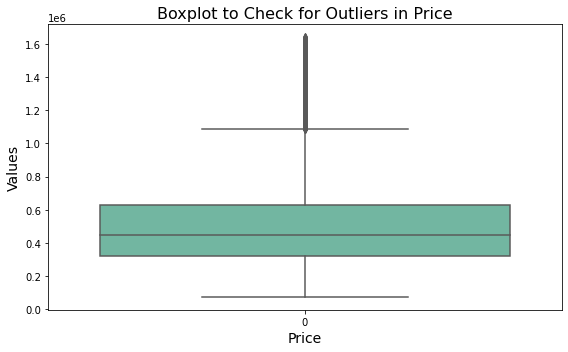

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df['price'], palette='Set2')
plt.title('Boxplot to Check for Outliers in Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.tight_layout()
plt.show()


In [18]:
remove_outliers = ['price']

for column in remove_outliers:
    z_scores = stats.zscore(df[column])
    threshold = 3  #threshold for outlier detection
    df = df[(abs(z_scores) < threshold)]




In [19]:
df.shape

(20789, 18)

### Model Building

In [20]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
}



### Training and Evaluating the models

In [22]:
metrics = {
    'R^2 Score': {},
    'Mean Squared Error': {},
    'Mean Absolute Error': {},
    'Root Mean Squared Error': {}
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    metrics['R^2 Score'][name] = r2
    metrics['Mean Squared Error'][name] = mse
    metrics['Mean Absolute Error'][name] = mae
    metrics['Root Mean Squared Error'][name] = rmse

metrics_df = pd.DataFrame(metrics)
metrics_df


C:\Users\kudik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.119e+14, tolerance: 8.394e+10



,R^2 Score,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
Linear Regression,0.699488,1.571355e+10,94204.326964,125353.709649
Decision Tree,0.722043,1.453414e+10,81316.469336,120557.619469
Random Forest,0.864226,7.099499e+09,56542.052947,84258.521941
Gradient Boosting,0.843457,8.185520e+09,63091.223447,90473.862486
XGBoost,0.865780,7.018264e+09,56815.902761,83775.078414
Ridge Regression,0.699491,1.571338e+10,94201.708512,125353.006228
Lasso Regression,0.699489,1.571346e+10,94203.673901,125353.328331


### Visulaizing the R2 scores

In [23]:
r2_scores = metrics_df['R^2 Score']

r2_trace = go.Bar(x=r2_scores.index, y=r2_scores.values, name='R^2 Score', marker=dict(color='green'))
layout = go.Layout(title='Model Evaluation Metrics',
                   xaxis=dict(title='Models'),
                   yaxis=dict(title='Value'))
fig = go.Figure(data=[r2_trace], layout=layout)
fig.show()

### Cross-validation to improve model performance

In [24]:
cv_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores[name] = -scores.mean()

for name, score in cv_scores.items():
    print(f"{name}: Cross-validated RMSE: {np.sqrt(score)}")


C:\Users\kudik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.972e+13, tolerance: 6.749e+10

C:\Users\kudik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.092e+13, tolerance: 6.754e+10

C:\Users\kudik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.834e+13, tolerance: 6.697e+10

C:\Users\kudik\anaconda3\lib\site-packages\sklearn\linear_model\_co

Linear Regression: Cross-validated RMSE: 122123.54485436475
Decision Tree: Cross-validated RMSE: 117913.33891403791
Random Forest: Cross-validated RMSE: 83496.41174947601
Gradient Boosting: Cross-validated RMSE: 88759.42416858686
XGBoost: Cross-validated RMSE: 82212.17144069291
Ridge Regression: Cross-validated RMSE: 122123.7555510846
Lasso Regression: Cross-validated RMSE: 122123.52565827992


C:\Users\kudik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.876e+13, tolerance: 6.691e+10



### Analyzing various number of folds to Random Forest Regressor

In [25]:
fold_values = [3,7,10,12]

cv_scores = {}

for fold in fold_values:
    scores = cross_val_score(models['Random Forest'], X_train, y_train, cv=fold, scoring='neg_mean_squared_error')
    cv_scores[fold] = -scores.mean()
print("Model: Random Forest")
for fold, score in cv_scores.items():
    print(f"Number of Folds: {fold}, Cross-validated RMSE: {np.sqrt(score)}")


Model: Random Forest
Number of Folds: 3, Cross-validated RMSE: 84766.06409930089
Number of Folds: 7, Cross-validated RMSE: 83352.08622140277
Number of Folds: 10, Cross-validated RMSE: 83057.59161201086
Number of Folds: 12, Cross-validated RMSE: 82775.99391718389


### Analyzing various number of folds to XGBoost Regressor

In [26]:
fold_values = [3,7,10,12,15,20]
cv_scores = {}

for fold in fold_values:
    scores = cross_val_score(models['XGBoost'], X_train, y_train, cv=fold, scoring='neg_mean_squared_error')
    cv_scores[fold] = -scores.mean()
print("Model: Random Forest")
for fold, score in cv_scores.items():
    print(f"Number of Folds: {fold}, Cross-validated RMSE: {np.sqrt(score)}")

Model: Random Forest
Number of Folds: 3, Cross-validated RMSE: 83564.55711199704
Number of Folds: 7, Cross-validated RMSE: 82199.5059191065
Number of Folds: 10, Cross-validated RMSE: 81334.76764792993
Number of Folds: 12, Cross-validated RMSE: 81620.42371885892
Number of Folds: 15, Cross-validated RMSE: 81542.58017069084
Number of Folds: 20, Cross-validated RMSE: 81921.0581173353


### Final Model Building using XGBoost Regressor

In [29]:
xgb_regressor = XGBRegressor()


scores = cross_val_score(xgb_regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
mean_rmse = np.sqrt(-scores.mean())

xgb_regressor.fit(X_train, y_train)


y_pred = xgb_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Mean Cross-Validated RMSE with 10 folds:", mean_rmse)
print("R^2 Score:", r2)


Mean Cross-Validated RMSE with 10 folds: 81334.76764792993
R^2 Score: 0.8657798303723212
